In [1]:
#Librerias
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
#ruta Gsmap
gsmap = '/home/fernando.huaranca/datosmunin/Gsmap_24hs/Gsmap_R0.25_24hs_2000-01-01.npz'
file = np.load(gsmap)
file

NpzFile '/home/fernando.huaranca/datosmunin/Gsmap_24hs/Gsmap_R0.25_24hs_2000-01-01.npz' with keys: pp_daily, longitudes, latitudes

In [3]:
latitudes = file['latitudes']
longitudes = file['longitudes']
pp_daily = file['pp_daily']

In [43]:
#Seleccionamos area

#Area no tropical
lat_north_med = -20
lat_south_med =  -45
long_west_med = 285
long_east_med = 320

#Area Tropical
lat_north_trop = 7
lat_south_trop = -18
long_west_trop = 285
long_east_trop = 320


In [44]:
#----------------AREA DE CLIMA TEMPLADO EN LATITUDES MEDIAS----------------------
lat_index_med = np.where((latitudes >= lat_south_med) & (latitudes<=lat_north_med))[0]
LAT_med = latitudes[lat_index_med]  

#Seleccionamos indices de latitudes

long_index_med = np.where((longitudes >= long_west_med) & (longitudes<=long_east_med))[0]
LONG_med = longitudes[long_index_med]

#----------------AREA DE CLIMA TROPICAL en LATITUDES ALTAS-------------------------
lat_index_trop = np.where((latitudes >= lat_south_trop) & (latitudes<=lat_north_trop))[0]
LAT_trop = latitudes[lat_index_trop]  

#Seleccionamos indices de latitudes

long_index_trop = np.where((longitudes >= long_west_trop) & (longitudes<=long_east_trop))[0]
LONG_trop = longitudes[long_index_trop]

In [45]:
#Regiones a graficar
CLIMA_TROP = pp_daily[lat_index_trop.min():lat_index_trop.max()+1,
                long_index_trop.min():long_index_trop.max()+1]



CLIMA_MEDIAS = pp_daily[lat_index_med.min():lat_index_med.max()+1,
                long_index_med.min():long_index_med.max()+1]

In [46]:
CLIMA_MEDIAS.shape

(101, 141)

In [47]:
CLIMA_TROP.shape

(101, 141)

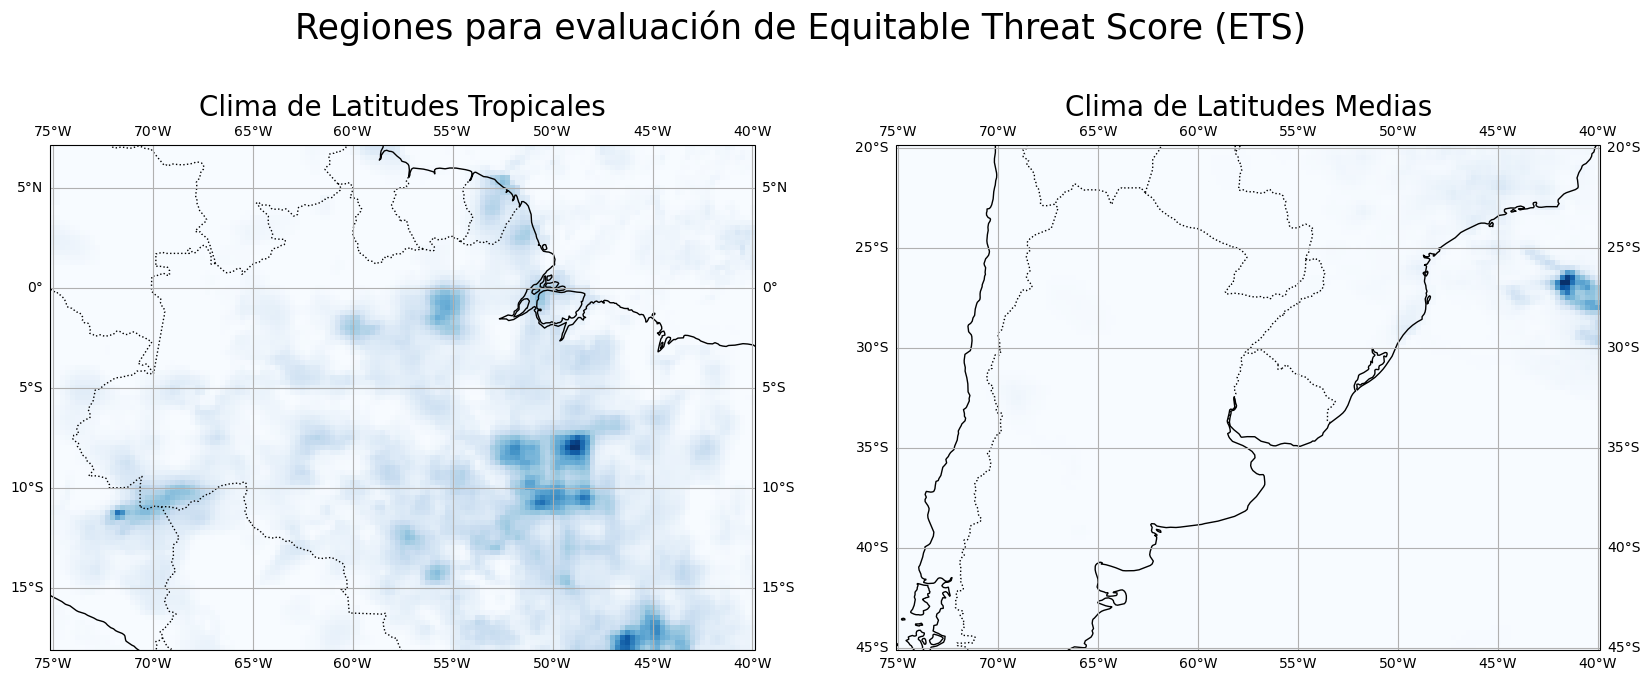

In [48]:
# Se crea una figura y un arreglo de ejes

fig, axs = plt.subplots(1,2, figsize=(20, 8),subplot_kw={'projection': ccrs.PlateCarree()})

plt.suptitle('Regiones para evaluación de Equitable Threat Score (ETS)',fontsize=25)
#----------Clima de latitudes altas--------

#Utilizando el metodo pcolormersh se crea un mapa de colores.
#Transform especifica la proyeccion utilizada
ax1 = axs[0].pcolormesh(LONG_trop, LAT_trop, CLIMA_TROP, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')


#Se agregan caracteristicas geograficas a la trama
axs[0].add_feature(cfeature.COASTLINE)
axs[0].add_feature(cfeature.BORDERS, linestyle=':') #estilo de linea punteada

#Agrega lineas de cuadricula al mapa. Indica que se dibujen lineas de latitud y longitud
#dms = True muestra las etiquetas en grados minutos y segundos
axs[0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
axs[0].set_title('Clima de Latitudes Tropicales',fontsize=20)
#-------------------------Clima de latitudes medias-----------------

ax2 = axs[1].pcolormesh(LONG_med, LAT_med, CLIMA_MEDIAS, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')
#print(axs)
#Se agregan caracteristicas geograficas a la trama
axs[1].add_feature(cfeature.COASTLINE)
axs[1].add_feature(cfeature.BORDERS, linestyle=':') #estilo de linea punteada
#Agrega lineas de cuadricula al mapa. Indica que se dibujen lineas de latitud y longitud
#dms = True muestra las etiquetas en grados minutos y segundos
axs[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
axs[1].set_title('Clima de Latitudes Medias',fontsize=20)
# Añadir una barra de colores

# Ajustar los márgenes entre los subgráficos horizontalmente
#plt.subplots_adjust(wspace=0.3)  # Cambia el valor según sea necesario

plt.savefig('/home/fernando.huaranca/datosmunin2/Thesis_Neuronal_Network/work/2-Datos_Sudamerica/salidas/regiones.png',dpi=300)

# Codigo para calcular los ets

In [28]:
#Librerias
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.metrics import confusion_matrix

Tratemos de crear el ETS a mano

In [5]:
#---------------GFS--------------
gfs_path = '/home/fernando.huaranca/datosmunin/GFS_24hs/GFS_R0.25_24hs_2000-01-01.npz'
my_gfs = np.load(gfs_path)

#------------GSMAP----------------
gsmap_path = '/home/fernando.huaranca/datosmunin/Gsmap_24hs/Gsmap_R0.25_24hs_2000-01-01.npz'
my_gsmap = np.load(gsmap_path)


#Cargamos las latitudes y longitudes 1 vez sola ya que son las mismas para gfs y gsmap

latitudes = my_gfs['latitudes']
longitudes = my_gfs['longitudes']

#Precipitaciones del GFS
pp_daily_gfs = my_gfs['pp_daily']

#Precipitaciones del Gsmap 
pp_daily_gsmap = my_gsmap['pp_daily']


In [6]:
#Seleccionamos area

#Area no tropical
lat_north_med = -20
lat_south_med =  -45
long_west_med = 285
long_east_med = 320

#Area Tropical
lat_north_trop = 7
lat_south_trop = -18
long_west_trop = 285
long_east_trop = 320

Sirve para GFS y Gsmap porque son las mismas dimensiones

In [7]:
#----------------AREA DE CLIMA TROPICAL en LATITUDES ALTAS-------------------------
lat_index_trop = np.where((latitudes >= lat_south_trop) & (latitudes<=lat_north_trop))[0]
LAT_trop = latitudes[lat_index_trop]  

#Seleccionamos indices de latitudes

long_index_trop = np.where((longitudes >= long_west_trop) & (longitudes<=long_east_trop))[0]
LONG_trop = longitudes[long_index_trop]

In [8]:
#GFS
CLIMA_TROP_gfs = pp_daily_gfs[lat_index_trop.min():lat_index_trop.max()+1,
                long_index_trop.min():long_index_trop.max()+1]

#Gsmap
CLIMA_TROP_gsmap = pp_daily_gsmap[lat_index_trop.min():lat_index_trop.max()+1,
                long_index_trop.min():long_index_trop.max()+1]

In [9]:
CLIMA_TROP_gfs

array([[ 3.9       ,  2.71      ,  3.04      , ..., 21.49      ,
        11.33      ,  2.7       ],
       [ 4.5       ,  3.24      ,  2.25      , ..., 12.97      ,
         5.41      ,  3.7600002 ],
       [ 4.72      ,  2.26      ,  2.        , ...,  6.48      ,
         4.36      ,  3.8700001 ],
       ...,
       [ 0.15      ,  0.15      ,  0.27      , ...,  2.        ,
         2.3       ,  5.02      ],
       [ 0.22      ,  0.19      ,  0.19      , ...,  3.5       ,
         2.3       ,  4.8       ],
       [ 0.32999998,  0.32      ,  0.31      , ...,  5.        ,
         3.4       ,  4.6       ]], dtype=float32)

In [10]:
CLIMA_TROP_gsmap

array([[0.        , 0.        , 0.        , ..., 0.5419294 , 0.39777765,
        0.2263281 ],
       [0.        , 0.        , 0.        , ..., 2.984537  , 1.9804777 ,
        1.2189571 ],
       [0.        , 0.        , 0.        , ..., 4.160715  , 1.9619335 ,
        1.4587979 ],
       ...,
       [0.2491041 , 0.4380362 , 0.5050345 , ..., 6.3726807 , 6.3986497 ,
        4.479528  ],
       [0.        , 0.07908733, 0.02570944, ..., 5.5256996 , 6.0880394 ,
        4.0111346 ],
       [0.        , 0.        , 0.        , ..., 6.2882466 , 6.581467  ,
        3.4206617 ]], dtype=float32)

Text(0.5, 1.0, 'GSMAP')

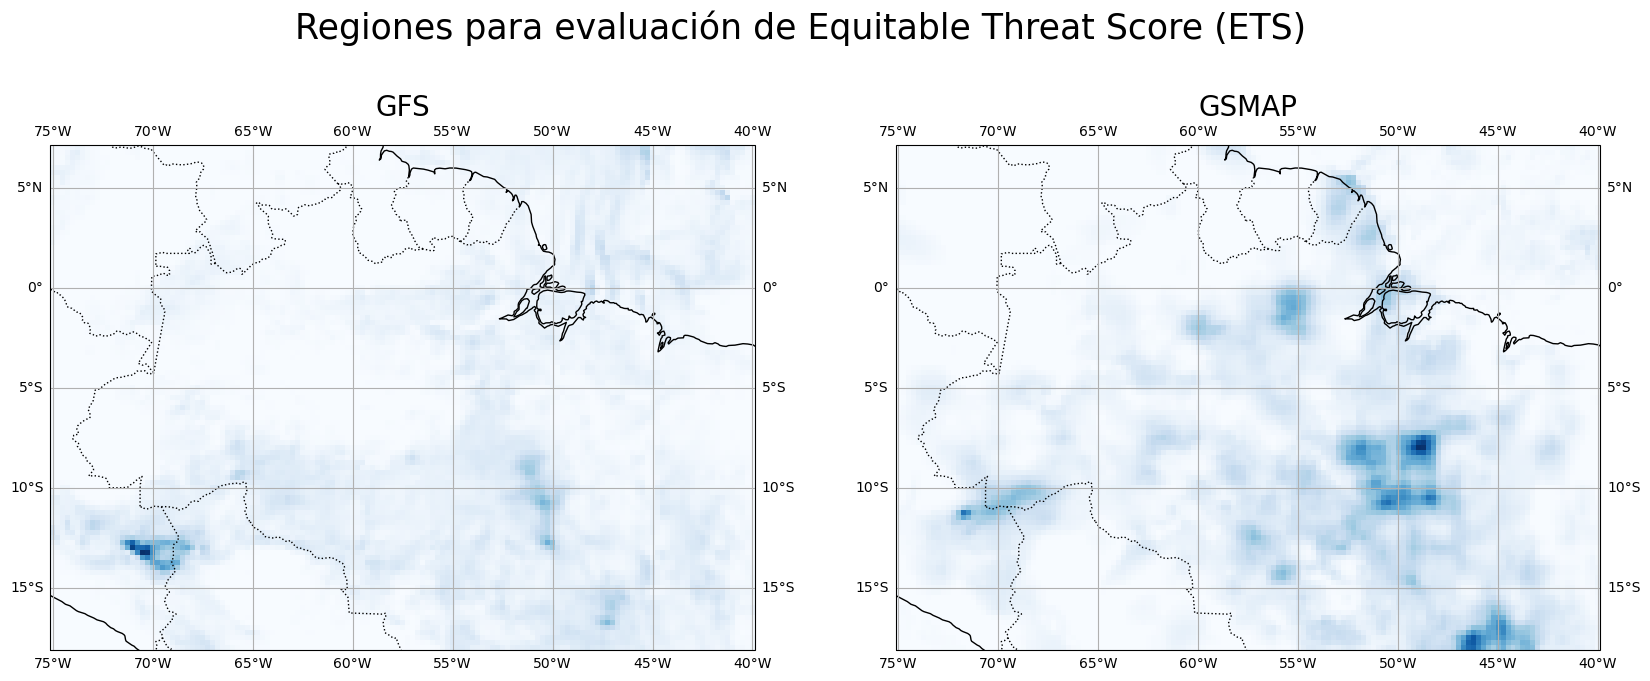

In [11]:
# Se crea una figura y un arreglo de ejes

fig, axs = plt.subplots(1,2, figsize=(20, 8),subplot_kw={'projection': ccrs.PlateCarree()})

plt.suptitle('Regiones para evaluación de Equitable Threat Score (ETS)',fontsize=25)
#----------Clima de latitudes altas--------

#Utilizando el metodo pcolormersh se crea un mapa de colores.
#Transform especifica la proyeccion utilizada
ax1 = axs[0].pcolormesh(LONG_trop, LAT_trop, CLIMA_TROP_gfs, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')


#Se agregan caracteristicas geograficas a la trama
axs[0].add_feature(cfeature.COASTLINE)
axs[0].add_feature(cfeature.BORDERS, linestyle=':') #estilo de linea punteada

#Agrega lineas de cuadricula al mapa. Indica que se dibujen lineas de latitud y longitud
#dms = True muestra las etiquetas en grados minutos y segundos
axs[0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
axs[0].set_title('GFS',fontsize=20)
#-------------------------Clima de latitudes medias-----------------

ax2 = axs[1].pcolormesh(LONG_trop,LAT_trop, CLIMA_TROP_gsmap, transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')
#print(axs)
#Se agregan caracteristicas geograficas a la trama
axs[1].add_feature(cfeature.COASTLINE)
axs[1].add_feature(cfeature.BORDERS, linestyle=':') #estilo de linea punteada
#Agrega lineas de cuadricula al mapa. Indica que se dibujen lineas de latitud y longitud
#dms = True muestra las etiquetas en grados minutos y segundos
axs[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
axs[1].set_title('GSMAP',fontsize=20)
# Añadir una barra de colores

# Ajustar los márgenes entre los subgráficos horizontalmente
#plt.subplots_adjust(wspace=0.3)  # Cambia el valor según sea necesario


In [ ]:
#mis dos matrices son
#CLIMA_TROP_gfs
#CLIMA_TROP_gsmap

In [12]:
umbral = 5
modelo = CLIMA_TROP_gfs.flatten() >= umbral
observado = CLIMA_TROP_gsmap.flatten() >= umbral
tn,fp,fn,tp = confusion_matrix(observado,modelo).ravel()



In [13]:
N = tp + fp + tn + fn
H = tp #Hits
O = tp + fp 
F = tp + fn  
R = (F*O)/N

#ets
ETS = (H-R)/(O+F-H-R)
ETS

0.21583941253611935

In [ ]:
umbral = 5
modelo = CLIMA_TROP_gfs.flatten() >= umbral
observado = CLIMA_TROP_gsmap.flatten() >= umbral
tn,fp,fn,tp = confusion_matrix(observado,modelo).ravel()

N = tp + fp + tn + fn
H = tp #Hits
O = tp + fp 
F = tp + fn  
R = (F*O)/N

#ets
ETS = (H-R)/(O+F-H-R)
ETS

In [35]:
def ETS(Modelo,Observado,Umbral):
    
    #Reshapeamos la matriz
    mod = Modelo.flatten() >= Umbral
    obs = Observado.flatten() >= Umbral

    #Guardo valores de metricas
    tn,fp,fn,tp = confusion_matrix(obs,mod).ravel()

    N = tp + fp + tn + fn
    H = tp #Hits
    O = tp + fp 
    F = tp + fn  
    R = (F*O)/N

    #ets
    ETS = (H-R)/(O+F-H-R)

    return

In [42]:
ETS(CLIMA_TROP_gfs,CLIMA_TROP_gsmap,5)

0.21583941253611935

Pero tenes que hacerlo para todo el periodo

In [127]:
from periodo_en_comun import devuelve_periodo_comun
import numpy as np
#Librerias
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.metrics import confusion_matrix

In [128]:
gfs_lista = glob.glob('/home/fernando.huaranca/datosmunin/GFS_24hs/*.npz')
gsmap_lista = glob.glob('/home/fernando.huaranca/datosmunin/Gsmap_24hs/*.npz')

In [147]:
Files = devuelve_periodo_comun(gfs_lista,gsmap_lista)

In [148]:
Files = Files[4380:4800]

In [155]:
def matriz_confusion_periodo(Modelo,Observado,Umbrales):
    
    print('Inicia funcion')
    matrices = []

    for umbral in Umbrales:
        print('umbral: ',umbral)
        print('Datos Ingresan a la funcion')
        print(Modelo.shape)
        print(Observado.shape)
        print('###')
    #    print('Datos ingresan a la funcion')
        print('Reshapeo datos de gfs')
        mod = Modelo.ravel() >= umbral
        print('El shape del modelo de reshapeado')
       # print('Dato de GFS')
        print(mod.shape)
        print('Reshapeo datos de gsmap')
        obs = Observado.ravel() >= umbral
        print('Shape de observado reshapeado')
      #  print('Dato GSMAP')
        print(obs.shape)
        
        #Devolveria
        #TP,FN,FP,TN
        cm = confusion_matrix(y_true=obs,y_pred=mod,labels=[True,False])
        
        print('Shape de matriz de confusion ',cm.shape)
        matrices.append(cm)

    print('caca')
    len(matrices)
    print(matrices[0].shape)
    print(matrices[1].shape)
    matriz_umbrales = np.stack(matrices,axis=0)

    print('boca')

    return matriz_umbrales


In [158]:
print('b')

b


Este seria el codigo, faltaria agregar la ETS

In [160]:
inicio = True
fallidos = []
Umbrales = [5,10,1]

#Carpetas donde se almacenan los datos de diferentes fuentes
folder_gfs = '/home/fernando.huaranca/datosmunin/GFS_24hs'
folder_gsmap = '/home/fernando.huaranca/datosmunin/Gsmap_24hs'

#-----Seleccionamos Areas------------------

#Area no tropical
lat_north_med = -20
lat_south_med =  -45
long_west_med = 285
long_east_med = 320

#Area Tropical
lat_north_trop = 7
lat_south_trop = -18
long_west_trop = 285
long_east_trop = 320


#------------------------------------------------------------------------------
#Extraemos las latitudes y longitudes de un archivo solo y luego usamos eso para
#todos los demas archivos

#Archivo unico
my_path_unico = '/home/fernando.huaranca/datosmunin/Gsmap_24hs/Gsmap_R0.25_24hs_2000-01-01.npz'
my_file_unico = np.load(my_path_unico)

#Extraemos las latitudes y longitudes de 1 archivo solo
latitudes = my_file_unico['latitudes']
longitudes = my_file_unico['longitudes']

#Definimos los indices y regiones 

#AREA DE CLIMA TROPICAL en LATITUDES ALTAS-------------------------
lat_index_trop = np.where((latitudes >= lat_south_trop) & (latitudes<=lat_north_trop))[0]
LAT_trop = latitudes[lat_index_trop] 

long_index_trop = np.where((longitudes >= long_west_trop) & (longitudes<=long_east_trop))[0]
LONG_trop = longitudes[long_index_trop]


#AREA DE CLIMA DE LATITUDES MEDIAS---------------
lat_index_med = np.where((latitudes >= lat_south_med) & (latitudes<=lat_north_med))[0]
LAT_med = latitudes[lat_index_med] 

long_index_med = np.where((longitudes >= long_west_med) & (longitudes<=long_east_med))[0]
LONG_med = longitudes[long_index_med]

#-------------------------------------------------------------------

#Para calcular porcentajes
k = 0 
total = len(Files)


for file in Files:
   
   k = k +1
   porcentaje = (k/total)*100
   print(file,'  ',porcentaje,' %')

   #Cargamos los archivos 
   path_modelo = os.path.join(folder_gfs,f'GFS_R0.25_24hs_{file}.npz')
   path_observacion = os.path.join(folder_gsmap,f'Gsmap_R0.25_24hs_{file}.npz')

   #Cargamos los archivos
   file_modelo = np.load(path_modelo)
   file_observacion = np.load(path_observacion)

   #Precipitaciones del GFS Modelo
   pp_modelo = file_modelo['pp_daily']
   
   #Precipitaciones del Gsmap Observaciones
   pp_observacion= file_observacion['pp_daily']

   
      
   #---------Realizamos el SUBSET-------------------------


   #------MODELO-------------------------
   #acadeberia empezar el try
   try:

      #Definimos la Matriz de Clima_Tropical con GFS
      CLIMA_TROP_gfs = pp_modelo[lat_index_trop.min():lat_index_trop.max()+1,long_index_trop.min():long_index_trop.max()+1]
      print(CLIMA_TROP_gfs.shape)
      #Definimos la Matriz de Clima Tropical con Gsmap
      CLIMA_TROP_gsmap = pp_observacion[lat_index_trop.min():lat_index_trop.max()+1,long_index_trop.min():long_index_trop.max()+1]
      print(CLIMA_TROP_gsmap.shape)
      #----OBSERVACION----------------
         
      #Definimos la Matriz de Clima_Tropical con GFS
      CLIMA_MEDIOS_gfs = pp_modelo[lat_index_med.min():lat_index_med.max()+1,long_index_med.min():long_index_med.max()+1]

      #Definimos la Matriz de Clima Tropical con Gsmap
      CLIMA_MEDIOS_gsmap = pp_observacion[lat_index_med.min():lat_index_med.max()+1,long_index_med.min():long_index_med.max()+1]

      #-------------------------------------------------------------   
      if inicio:

         #Calculamos la matriz de confusion de nuestro primera fecha
         cm_tropical = matriz_confusion_periodo(CLIMA_TROP_gfs,CLIMA_TROP_gsmap,Umbrales)
         cm_medios = matriz_confusion_periodo(CLIMA_MEDIOS_gfs,CLIMA_MEDIOS_gsmap,Umbrales)
         inicio = False
         print('TRABALENGUA')
         # print('Aca ',cm_tropical.shape)

      else:
         #Matriz de confusion y vamos sumando
         print('vegano')
         cm_tropical = matriz_confusion_periodo(CLIMA_TROP_gfs,CLIMA_TROP_gsmap,Umbrales) + cm_tropical
         print('choco')
         print(CLIMA_MEDIOS_gfs.shape)
         print(CLIMA_MEDIOS_gsmap.shape)
         cm_medios = matriz_confusion_periodo(CLIMA_MEDIOS_gfs,CLIMA_MEDIOS_gsmap,Umbrales) + cm_medios
         print('poroto')
        # print(cm_medios)
   except Exception as e:
       # print(f'Error al procesar el archivo {file}: {str(e)}')
       # print(CLIMA_TROP_gfs.shape)
       # print(CLIMA_TROP_gsmap.shape)
        #print(CLIMA_MEDIOS_gfs.shape)
        #print(CLIMA_MEDIOS_gsmap.shape)
        #print(cm_tropical.shape)
        #print(cm_medios.shape)
      fallidos.append(file)
   
      

2012-01-07    0.2380952380952381  %
(101, 141)
(101, 141)
Inicia funcion
umbral:  5
Datos Ingresan a la funcion
(101, 141)
(101, 141)
###
Reshapeo datos de gfs
El shape del modelo de reshapeado
(14241,)
Reshapeo datos de gsmap
Shape de observado reshapeado
(14241,)
Shape de matriz de confusion  (2, 2)
umbral:  10
Datos Ingresan a la funcion
(101, 141)
(101, 141)
###
Reshapeo datos de gfs
El shape del modelo de reshapeado
(14241,)
Reshapeo datos de gsmap
Shape de observado reshapeado
(14241,)
Shape de matriz de confusion  (2, 2)
umbral:  1
Datos Ingresan a la funcion
(101, 141)
(101, 141)
###
Reshapeo datos de gfs
El shape del modelo de reshapeado
(14241,)
Reshapeo datos de gsmap
Shape de observado reshapeado
(14241,)
Shape de matriz de confusion  (2, 2)
caca
(2, 2)
(2, 2)
boca
Inicia funcion
umbral:  5
Datos Ingresan a la funcion
(101, 141)
(101, 141)
###
Reshapeo datos de gfs
El shape del modelo de reshapeado
(14241,)
Reshapeo datos de gsmap
Shape de observado reshapeado
(14241,)
Shap

In [162]:
fallidos

['2012-05-17']

In [135]:
#archivos
fecha = '2012-05-17'

In [136]:
#Archivo unico
my_path_unico = f'/home/fernando.huaranca/datosmunin/Gsmap_24hs/Gsmap_R0.25_24hs_{fecha}.npz'
my_file_unico = np.load(my_path_unico)

#Extraemos las latitudes y longitudes de 1 archivo solo
latitudes = my_file_unico['latitudes']
longitudes = my_file_unico['longitudes']


In [142]:
latitudes.shape

(297,)

In [140]:
my_file_unico['pp_daily'].shape

(297, 281)

In [106]:
import numpy as np

# Definir una matriz 2x2
matriz = np.array([[1, 2],
                   [3, 4]])

# Usando flatten()
array_flatten = matriz.flatten()
#print('Flatten ',array_flatten)
# Usando ravel()
array_ravel = matriz.ravel()
#print(array_rave)
# Modificar los valores en los arrays resultantes
array_flatten[0] = 100
array_ravel[0] = 200

# Imprimir la matriz original y los arrays resultantes
print("Matriz original:")
print(matriz)
print("\nResultado de flatten():")
print(array_flatten)
print("\nResultado de ravel():")
print(array_ravel)


Matriz original:
[[200   2]
 [  3   4]]

Resultado de flatten():
[100   2   3   4]

Resultado de ravel():
[200   2   3   4]


In [64]:
cm_medios[0].shape

(2, 2)

In [63]:
cm_tropical.shape

(3, 2, 2)

In [100]:
fallidos

['2000-07-28',
 '2001-08-09',
 '2003-08-12',
 '2004-05-10',
 '2004-08-09',
 '2006-07-05',
 '2007-06-05',
 '2008-05-09',
 '2009-04-29',
 '2009-06-07',
 '2010-06-08',
 '2011-05-30',
 '2012-05-17',
 '2013-04-19',
 '2013-04-20',
 '2013-07-29',
 '2013-10-06',
 '2016-09-27',
 '2018-09-08',
 '2019-09-24']

In [113]:
zz = np.load('/home/fernando.huaranca/datosmunin/GFS_24hs/GFS_R0.25_24hs_2000-07-28.npz')
zz

NpzFile '/home/fernando.huaranca/datosmunin/GFS_24hs/GFS_R0.25_24hs_2000-07-28.npz' with keys: pp_daily, latitudes, longitudes, inicio_corrida, forecast_24

In [114]:
zz['pp_daily'].flatten().shape

(83457,)

In [ ]:
f'GFS_R0.25_24hs_{file}.npz'

In [99]:
fallidos

['2000-07-28',
 '2001-08-09',
 '2003-08-12',
 '2004-05-10',
 '2004-08-09',
 '2006-07-05',
 '2007-06-05',
 '2008-05-09',
 '2009-04-29',
 '2009-06-07',
 '2010-06-08',
 '2011-05-30',
 '2012-05-17',
 '2013-04-19',
 '2013-04-20',
 '2013-07-29',
 '2013-10-06',
 '2016-09-27',
 '2018-09-08',
 '2019-09-24']

In [92]:
cm_medios

array([[[168250286,  13159036],
        [  8186877,  17937894]],

       [[176171356,  10705076],
        [  7026632,  13631029]]])

In [13]:
#Se dijo que era mayor a 5 y fue 5 TRUE TRUE TP
#Se dijo que era menor a 5 y fue menor a 5 FALSE FALSE TN
#Se dijo que era mayor a 5 y fue menor a 5 

array([False, False, False, ..., False, False, False])

array([False, False, False, ..., False, False, False])

In [91]:
fallidos

[]